## Compare the repeats between two scirpts

Ashley(AS): https://github.com/desihub/LSS/blob/main/scripts/get_repeat_redshifts.py

repeat_dir = '/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1' 

local_saved = '/pscratch/sd/s/shengyu/repeats/DA2/loa-v1'

Anand(AN): https://github.com/desihub/LSS/blob/main/scripts/desi_main_repeats.py

repeat_dir = '/global/cfs/cdirs/desi/spectro/redux/main' 

local_saved = '/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1'

1. BGS bright, or + BGS faint?, double check the numbers
2. how to do the z selection for the repetas sample, which is the ture rate for catastrophics
3. QSO catas rate inconsistency between two scripts, TILEID issues?

In [104]:
import os, sys
import random
import fitsio
import numpy as np
from astropy.table import Table,join,unique,vstack
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import ticker
import random

sys.path.append('/global/homes/s/shengyu/project_rc/main/Y3/')
from helper import REDSHIFT_VSMEAR, REDSHIFT_LSS_VSMEAR, REDSHIFT_CUBICBOX, EDGES, COLOR_TRACERS, GET_RECON_BIAS
from Y3_redshift_systematics import vsmear, vsmear_modelling
%load_ext autoreload
%autoreload 2

Z_SMEAR = REDSHIFT_VSMEAR.copy()
Z_SMEAR['LRG'] = [(0.4, 1.1)]+Z_SMEAR['LRG']
Z_SMEAR['ELG'] = [(0.8, 1.6)]+Z_SMEAR['ELG']
Z_SMEAR['QSO'] = [(0.8, 2.1)]+Z_SMEAR['QSO']
c = 299792.458

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
# REPEAT_DIR = '/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1'
REPEAT_DIR = '/pscratch/sd/s/shengyu/repeats/DA2/loa-v1'
d = Table.read(f'{REPEAT_DIR}/LRGrepeats.fits', hdu=1)
d

TARGETID,Z1,Z2
int64,float64,float64
39627339943905527,0.503487468787135,0.5030736096262604
39627340317203683,0.4258089878141635,0.4257584545874443
39627340392696391,0.892714832239963,0.8926546975762084
39627340409477724,0.8665820758601103,0.8670711906112218
39627340468191977,0.9577680568974755,0.957026375846282
39627340468196121,0.7982010790880905,0.7985030940364856
39627340468196844,0.7913836884374823,0.7920420290347512
39627340539497376,0.5124428353486831,0.512092869091561
39627345669128996,0.6120071955330506,0.6118918870633067


## The nz and distribution of redshift errors 

/tmp/ipykernel_1272820/2094987990.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.97])


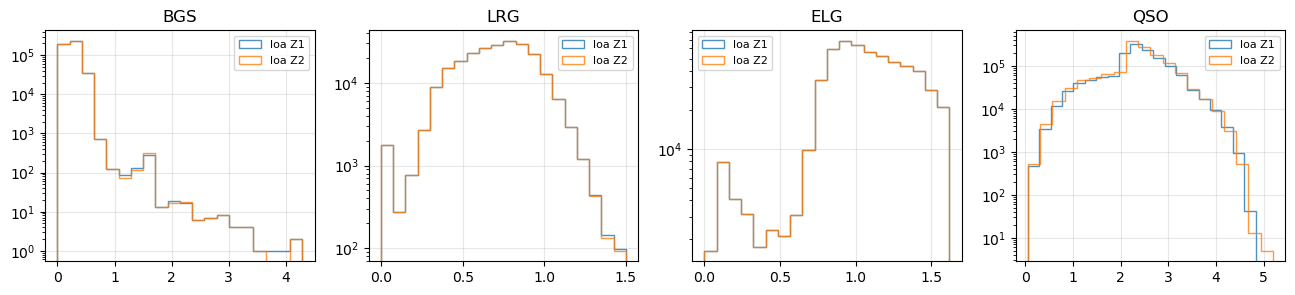

In [106]:
# loa-v1 repeats from Ashley
# list of tracers
tracers = ['BGS', 'LRG', 'ELG', 'QSO']
REPEAT_DIR = '/pscratch/sd/s/shengyu/repeats/DA2/loa-v1'

# for Ashley's script
fig = plt.figure(figsize = (16, 3))
gs = gridspec.GridSpec(1, 4, wspace=0.2, hspace=0.25)
for i, tracer in enumerate(tracers):
    d = Table.read(f'{REPEAT_DIR}/{tracer}repeats.fits', hdu=1)
    ax = fig.add_subplot(gs[i]) 
    ax.hist(d['Z1'], bins=20, alpha=0.8, histtype='step', label='loa Z1')
    ax.hist(d['Z2'], bins=20, alpha=0.8, histtype='step', label='loa Z2')
    ax.set_yscale('log')
    ax.set_title(tracer)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

/tmp/ipykernel_1272820/1751668034.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.97])


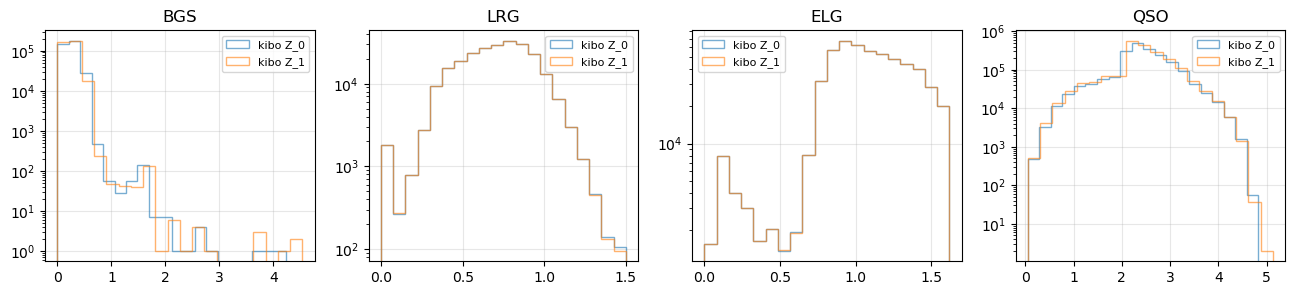

In [107]:
# kibo-v1 repeats from Anand
# list of tracers
tracers = ['BGS', 'LRG', 'ELG', 'QSO']
REPEAT_DIR = '/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1'

# for Ashley's script
fig = plt.figure(figsize = (16, 3))
gs = gridspec.GridSpec(1, 4, wspace=0.2, hspace=0.25)
for i, tracer in enumerate(tracers):
    d = Table.read(f'{REPEAT_DIR}/{tracer}repeats.fits', hdu=1)
    ax = fig.add_subplot(gs[i]) 
    ax.hist(d['Z_0'], bins=20, alpha=0.6, histtype='step', label='kibo Z_0')
    ax.hist(d['Z_1'], bins=20, alpha=0.6, histtype='step', label='kibo Z_1')
    ax.set_yscale('log')
    ax.set_title(tracer)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## The redshift errors quantities

In [128]:
def repeat_quantity(tracer, zmin, zmax, script='AS', dv_limit = 1000, selz_type = 0):
    if script == 'AN':
        REPEAT_DIR = f'/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1' 
        d = Table.read(REPEAT_DIR+f'/{tracer}repeats.fits', hdu=1) 
        sel      = np.full(len(d),True)
        sel = np.isfinite(d['Z_0']) & np.isfinite(d['Z_1'])
        if selz_type == 0:
            selz = sel.copy()
        elif selz_type == 1:
            selz = ((zmin<d["Z_0"])&(d["Z_0"]<zmax))
        elif selz_type == 2:
            selz = ((zmin<d["Z_0"])&(d["Z_0"]<zmax))|((zmin<d["Z_1"])&(d["Z_1"]<zmax))
        d_zbin = d[sel & selz]     
        dv_zbin = (d_zbin['Z_1']-d_zbin['Z_0'])/(1+d_zbin['Z_0'])*c
    elif script == 'AS':
        REPEAT_DIR = f'/pscratch/sd/s/shengyu/repeats/DA2/loa-v1'
        d = Table.read(REPEAT_DIR+f'/{tracer}repeats.fits', hdu=1) 
        sel      = np.full(len(d),True)
        sel = np.isfinite(d['Z1']) & np.isfinite(d['Z2'])
        if selz_type == 0:
            selz = sel.copy()
        elif selz_type == 1:
            selz = ((zmin<d["Z1"])&(d["Z1"]<zmax))
        elif selz_type == 2:
            selz = ((zmin<d["Z1"])&(d["Z1"]<zmax))|((zmin<d["Z2"])&(d["Z2"]<zmax))
        # d_zbin = d[sel]
        d_zbin = d[sel & selz]
        dv_zbin = (d_zbin['Z2']-d_zbin['Z1'])/(1+d_zbin['Z1'])*c
    number = len(d_zbin) # number of repeats
    selcata = abs(dv_zbin) < dv_limit # select the catastrophics outliers
    logdv_zbin = np.log10(abs(dv_zbin)) 
    median_dv = 10**np.median(logdv_zbin) # median of the dv
    dv_smear = dv_zbin[selcata] # redshift uncertainty part
    RMS = np.sqrt(np.mean(dv_smear ** 2)) # RMS of the dv
    fc = (1-len(dv_smear)/len(dv_zbin))*100 # catastrophic rate in %
    qu = dict(number=number, median=median_dv, RMS=RMS, fc=fc)
    return qu

In [132]:
# overall comparison
zmin = 0.
zmax = 6. 
tracers = ['BGS', 'LRG', 'ELG', 'QSO']
for tracer in tracers:
    dv_limit = 3000 if tracer == 'QSO' else 1000
    print(f'{tracer}', f'catas dv>{dv_limit} or dz>{dv_limit/c:.4f}' )
    for script in ['AN','AS']:
        qu = repeat_quantity(tracer, zmin, zmax, script=script, dv_limit=dv_limit, selz_type=0)
        display = []
        for q_ind, quantity in enumerate(qu):
            display.append((f'{quantity}: {qu[quantity]:.2f}') if q_ind>0 else (f'{quantity} {qu[quantity]}'))
        print(script, display)

BGS catas dv>1000 or dz>0.0033
AN ['number 348229', 'median: 12.54', 'RMS: 37.23', 'fc: 0.52']
AS ['number 465089', 'median: 12.54', 'RMS: 37.59', 'fc: 0.72']
LRG catas dv>1000 or dz>0.0033
AN ['number 239117', 'median: 38.14', 'RMS: 79.49', 'fc: 0.67']
AS ['number 233471', 'median: 38.27', 'RMS: 80.23', 'fc: 0.60']
ELG catas dv>1000 or dz>0.0033
AN ['number 538883', 'median: 7.63', 'RMS: 25.61', 'fc: 0.25']
AS ['number 549657', 'median: 7.85', 'RMS: 27.34', 'fc: 0.25']
QSO catas dv>3000 or dz>0.0100
AN ['number 1969823', 'median: 70.35', 'RMS: 380.94', 'fc: 0.75']
AS ['number 1359473', 'median: 70.77', 'RMS: 380.09', 'fc: 0.72']


In [136]:
# for difference tracer in all redshift bins
for tracer in ['BGS']:
    for i,(zmin, zmax) in enumerate(Z_SMEAR[tracer]):
        dv_limit = 3000 if tracer == 'QSO' else 1000
        i_suffix = i if i>0 else ''
        print(f'{tracer}{i_suffix}', (zmin, zmax), f'dv>{dv_limit} or dz>{dv_limit/c:.4f}' )
        for script in ['AN','AS']:
            display = []
            qu = repeat_quantity(tracer, zmin, zmax, script=script, dv_limit=dv_limit, selz_type=0)
            for q_ind, quantity in enumerate(qu):
                display.append((f'{quantity}: {qu[quantity]:.2f}') if q_ind>0 else (f'{quantity} {qu[quantity]}'))
            print(script, display)


BGS (0.1, 0.4) dv>1000 or dz>0.0033
AN ['number 348229', 'median: 12.54', 'RMS: 37.23', 'fc: 0.52']
AS ['number 465089', 'median: 12.54', 'RMS: 37.59', 'fc: 0.72']


In [142]:
# for difference tracer in all redshift bins
for tracer in ['LRG']:
    for i,(zmin, zmax) in enumerate(Z_SMEAR[tracer]):
        dv_limit = 3000 if tracer == 'QSO' else 1000
        i_suffix = i if i>0 else ''
        print(f'{tracer}{i_suffix}', (zmin, zmax), f'dv>{dv_limit} or dz>{dv_limit/c:.4f}')
        for script in ['AN','AS']:
            display = []
            qu = repeat_quantity(tracer, zmin, zmax, script=script, dv_limit=dv_limit, selz_type=1)
            for q_ind, quantity in enumerate(qu):
                display.append((f'{quantity}: {qu[quantity]:.2f}') if q_ind>0 else (f'{quantity} {qu[quantity]}'))
            print(script, display)

LRG (0.4, 1.1) dv>1000 or dz>0.0033
AN ['number 212528', 'median: 40.53', 'RMS: 81.49', 'fc: 0.52']
AS ['number 207651', 'median: 40.68', 'RMS: 82.12', 'fc: 0.46']
LRG1 (0.4, 0.6) dv>1000 or dz>0.0033
AN ['number 52865', 'median: 26.92', 'RMS: 54.68', 'fc: 0.60']
AS ['number 51707', 'median: 26.98', 'RMS: 55.22', 'fc: 0.47']
LRG2 (0.6, 0.8) dv>1000 or dz>0.0033
AN ['number 77916', 'median: 39.15', 'RMS: 74.95', 'fc: 0.48']
AS ['number 76042', 'median: 39.29', 'RMS: 75.55', 'fc: 0.50']
LRG3 (0.8, 1.1) dv>1000 or dz>0.0033
AN ['number 81747', 'median: 56.41', 'RMS: 99.87', 'fc: 0.50']
AS ['number 79902', 'median: 56.51', 'RMS: 100.60', 'fc: 0.42']


In [143]:
for tracer in ['ELG']:
# for tracer in ['QSO']:
    for i,(zmin, zmax) in enumerate(Z_SMEAR[tracer]):
        dv_limit = 3000 if tracer == 'QSO' else 1000
        i_suffix = i if i>0 else ''
        print(f'{tracer}{i_suffix}', (zmin, zmax), f'dv>{dv_limit} or dz>{dv_limit/c:.4f}' )
        for script in ['AN','AS']:
            display = []
            qu = repeat_quantity(tracer, zmin, zmax, script=script, dv_limit=dv_limit, selz_type=1)
            for q_ind, quantity in enumerate(qu):
                display.append((f'{quantity}: {qu[quantity]:.2f}') if q_ind>0 else (f'{quantity} {qu[quantity]}'))
            print(script, display)

ELG (0.8, 1.6) dv>1000 or dz>0.0033
AN ['number 476761', 'median: 8.36', 'RMS: 26.57', 'fc: 0.24']
AS ['number 481085', 'median: 8.58', 'RMS: 28.16', 'fc: 0.23']
ELG1 (0.8, 1.1) dv>1000 or dz>0.0033
AN ['number 225521', 'median: 6.60', 'RMS: 19.49', 'fc: 0.14']
AS ['number 229907', 'median: 6.83', 'RMS: 21.22', 'fc: 0.13']
ELG2 (1.1, 1.3) dv>1000 or dz>0.0033
AN ['number 125461', 'median: 8.83', 'RMS: 24.56', 'fc: 0.18']
AS ['number 124977', 'median: 8.99', 'RMS: 25.60', 'fc: 0.18']
ELG3 (1.3, 1.6) dv>1000 or dz>0.0033
AN ['number 125779', 'median: 12.22', 'RMS: 37.34', 'fc: 0.47']
AS ['number 126201', 'median: 12.54', 'RMS: 39.44', 'fc: 0.45']


In [146]:
for tracer in ['QSO']:
# for tracer in ['QSO']:
    for i,(zmin, zmax) in enumerate(Z_SMEAR[tracer]):
        dv_limit = 3000 if tracer == 'QSO' else 1000
        i_suffix = i if i>0 else ''
        print(f'{tracer}{i_suffix}', (zmin, zmax), f'dv>{dv_limit} or dz>{dv_limit/c:.4f}' )
        for script in ['AS']:
            display = []
            qu = repeat_quantity(tracer, zmin, zmax, script=script, dv_limit=dv_limit, selz_type=2)
            for q_ind, quantity in enumerate(qu):
                display.append((f'{quantity}: {qu[quantity]:.2f}') if q_ind>0 else (f'{quantity} {qu[quantity]}'))
            print(script, display)

QSO (0.8, 2.1) dv>3000 or dz>0.0100
AS ['number 255111', 'median: 92.41', 'RMS: 396.16', 'fc: 1.48']
QSO1 (0.8, 1.1) dv>3000 or dz>0.0100
AS ['number 35105', 'median: 30.13', 'RMS: 185.00', 'fc: 2.27']
QSO2 (1.1, 1.4) dv>3000 or dz>0.0100
AS ['number 52872', 'median: 52.62', 'RMS: 237.87', 'fc: 1.32']
QSO3 (1.4, 1.7) dv>3000 or dz>0.0100
AS ['number 65305', 'median: 137.07', 'RMS: 449.96', 'fc: 1.62']
QSO4 (1.7, 2.1) dv>3000 or dz>0.0100
AS ['number 103129', 'median: 145.03', 'RMS: 482.12', 'fc: 1.42']


In [ ]:
qu = repeat_quantity('QSO', 0.8, 2.1, script='AS', dv_limit=10000)

{'number': 255111, 'median': 92.40748031676436, 'RMS': 484.27009190164233, 'fc': 1.0771781695026905}


/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
REPEAT_DIR = f'/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1' 
d = Table.read(REPEAT_DIR+f'/QSOrepeats.fits', hdu=1)
zmin = 0.8
zmax = 2.1
selz = ((zmin<d["Z_0"])&(d["Z_0"]<zmax))|((zmin<d["Z_1"])&(d["Z_1"]<zmax))
sel_catas = abs(d['DV'])>3000
d[selz & sel_catas]

TARGETID,TARGET_RA,TARGET_DEC,PHOTSYS,DESI_TARGET,BGS_TARGET,SURVEY_0,TILEID_0,LASTNIGHT_0,PETAL_LOC_0,FIBER_0,COADD_FIBERSTATUS_0,TSNR2_BGS_0,TSNR2_LRG_0,TSNR2_ELG_0,TSNR2_QSO_0,TSNR2_LYA_0,Z_0,ZERR_0,ZWARN_0,DELTACHI2_0,OII_FLUX_0,OII_FLUX_IVAR_0,Z_NEW_0,ZERR_NEW_0,IS_QSO_QN_NEW_RR_0,ZMTL_ZWARN_0,ZMTL_Z_QN_0,ZMTL_Z_QN_CONF_0,ZMTL_IS_QSO_QN_0,GOOD_BGS_0,GOOD_LRG_0,GOOD_ELG_0,GOOD_QSO_0,SURVEY_1,TILEID_1,LASTNIGHT_1,PETAL_LOC_1,FIBER_1,COADD_FIBERSTATUS_1,TSNR2_BGS_1,TSNR2_LRG_1,TSNR2_ELG_1,TSNR2_QSO_1,TSNR2_LYA_1,Z_1,ZERR_1,ZWARN_1,DELTACHI2_1,OII_FLUX_1,OII_FLUX_IVAR_1,Z_NEW_1,ZERR_NEW_1,IS_QSO_QN_NEW_RR_1,ZMTL_ZWARN_1,ZMTL_Z_QN_1,ZMTL_Z_QN_CONF_1,ZMTL_IS_QSO_QN_1,GOOD_BGS_1,GOOD_LRG_1,GOOD_ELG_1,GOOD_QSO_1,DV,DV_NEW
int64,float64,float64,bytes1,int64,int64,bytes4,int32,int32,int16,int32,int32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float32,float64,float32,bool,int64,float64,float64,int16,bool,bool,bool,bool,bytes4,int32,int32,int16,int32,int32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float32,float64,float32,bool,int64,float64,float64,int16,bool,bool,bool,bool,float64,float64
39627334763942114,62.41429578644092,-19.012558123878666,S,4611686018427650052,0,main,10243,20211103,0,159,0,6170.5703,73.281296,104.68083,28.031994,90.516266,1.6660638401922518,6.759132878018886e-05,0,19.176493525505066,--,--,2.5430464197795435,0.00046857048,True,0,2.5575442708917655,0.9999986109577833,1,False,False,False,True,main,7146,20221220,0,457,0,6175.2344,77.55812,113.8521,28.138481,87.41986,2.5430902450193686,0.000980711279919456,4,5.257853996939957,--,--,--,--,False,4,2.5471454579681563,0.999999266524066,1,False,False,False,True,98619.50703140875,--
39627339939711018,27.9983732539334,-18.722609206776017,S,4611686018427650052,0,main,9107,20211031,1,802,0,7532.526,89.49169,130.32314,35.282127,121.794106,1.625469532263648,0.0008135278351569729,0,347.97027962608263,--,--,--,--,False,0,1.6248397731449122,0.9999999977235363,1,True,False,False,True,main,4311,20231205,9,4927,0,7311.302,83.73307,120.10724,31.986294,179.83957,1.6190576468819584,0.000782222975742356,0,620.8077875552699,-0.5544501,2.0531964,--,--,False,0,1.619244355967,0.9999957583940197,1,True,False,False,True,-732.1489948252005,--
39627340275255870,49.08957020995101,-18.708253556750233,S,4611686018428305446,0,main,5578,20240115,1,876,0,6322.417,73.44809,102.90688,26.166744,86.528496,0.6726897212706846,8.827207359091725e-05,4,0.9271681755781174,2.3046036,0.5625291,1.8717108538833895,0.0009413722,True,4,1.891695280060401,0.9999996122682022,1,False,False,False,True,main,2446,20231207,9,4984,0,7533.015,89.10441,126.55614,34.16395,164.99431,1.908172028624551,0.0014300663679107635,0,38.71360712824389,--,--,--,--,False,0,1.8911494852920163,0.9999994441455812,1,False,False,False,True,221432.74573108266,--
39627340304620362,51.072010223479815,-18.73415535595483,S,4611686018428305446,0,main,5578,20240115,9,4516,0,6902.3906,76.99681,114.84182,28.513977,84.74939,2.1264313664842773,0.00040922789155693664,0,30.09002346545458,--,--,--,--,False,0,2.110210099059035,0.9999999985372952,1,False,False,False,True,main,2431,20211211,1,893,0,9923.741,119.62926,205.14374,45.321026,85.4882,2.085270154827261,0.0002846587915212237,0,33.26908776164055,--,--,--,--,False,0,2.1065035305106052,0.9999999994676816,1,False,False,False,True,-3946.9348181442565,--
39627340304620362,51.072010223479815,-18.73415535595483,S,4611686018428305446,0,main,5578,20240115,9,4516,0,6902.3906,76.99681,114.84182,28.513977,84.74939,2.1264313664842773,0.00040922789155693664,0,30.09002346545458,--,--,--,--,False,0,2.110210099059035,0.9999999985372952,1,False,False,False,True,main,10246,20240129,1,564,0,6740.451,81.354614,115.00851,31.25117,95.09421,2.0875203941710527,0.0003347790012987621,0,30.94591740705073,--,--,--,--,False,0,2.1081713631441534,0.9999999996100886,1,False,False,False,True,-3731.160120130599,--
39627340304620362,51.072010223479815,-18.73415535595483,

In [284]:
sel_catas = abs(d['DV'])>3000
d[selz & sel_catas]

TARGETID,TARGET_RA,TARGET_DEC,PHOTSYS,DESI_TARGET,BGS_TARGET,SURVEY_0,TILEID_0,LASTNIGHT_0,PETAL_LOC_0,FIBER_0,COADD_FIBERSTATUS_0,TSNR2_BGS_0,TSNR2_LRG_0,TSNR2_ELG_0,TSNR2_QSO_0,TSNR2_LYA_0,Z_0,ZERR_0,ZWARN_0,DELTACHI2_0,OII_FLUX_0,OII_FLUX_IVAR_0,Z_NEW_0,ZERR_NEW_0,IS_QSO_QN_NEW_RR_0,ZMTL_ZWARN_0,ZMTL_Z_QN_0,ZMTL_Z_QN_CONF_0,ZMTL_IS_QSO_QN_0,GOOD_BGS_0,GOOD_LRG_0,GOOD_ELG_0,GOOD_QSO_0,SURVEY_1,TILEID_1,LASTNIGHT_1,PETAL_LOC_1,FIBER_1,COADD_FIBERSTATUS_1,TSNR2_BGS_1,TSNR2_LRG_1,TSNR2_ELG_1,TSNR2_QSO_1,TSNR2_LYA_1,Z_1,ZERR_1,ZWARN_1,DELTACHI2_1,OII_FLUX_1,OII_FLUX_IVAR_1,Z_NEW_1,ZERR_NEW_1,IS_QSO_QN_NEW_RR_1,ZMTL_ZWARN_1,ZMTL_Z_QN_1,ZMTL_Z_QN_CONF_1,ZMTL_IS_QSO_QN_1,GOOD_BGS_1,GOOD_LRG_1,GOOD_ELG_1,GOOD_QSO_1,DV,DV_NEW
int64,float64,float64,bytes1,int64,int64,bytes4,int32,int32,int16,int32,int32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float32,float64,float32,bool,int64,float64,float64,int16,bool,bool,bool,bool,bytes4,int32,int32,int16,int32,int32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float32,float64,float32,bool,int64,float64,float64,int16,bool,bool,bool,bool,float64,float64
39627334763942114,62.41429578644092,-19.012558123878666,S,4611686018427650052,0,main,10243,20211103,0,159,0,6170.5703,73.281296,104.68083,28.031994,90.516266,1.6660638401922518,6.759132878018886e-05,0,19.176493525505066,--,--,2.5430464197795435,0.00046857048,True,0,2.5575442708917655,0.9999986109577833,1,False,False,False,True,main,7146,20221220,0,457,0,6175.2344,77.55812,113.8521,28.138481,87.41986,2.5430902450193686,0.000980711279919456,4,5.257853996939957,--,--,--,--,False,4,2.5471454579681563,0.999999266524066,1,False,False,False,True,98619.50703140875,--
39627340275255870,49.08957020995101,-18.708253556750233,S,4611686018428305446,0,main,5578,20240115,1,876,0,6322.417,73.44809,102.90688,26.166744,86.528496,0.6726897212706846,8.827207359091725e-05,4,0.9271681755781174,2.3046036,0.5625291,1.8717108538833895,0.0009413722,True,4,1.891695280060401,0.9999996122682022,1,False,False,False,True,main,2446,20231207,9,4984,0,7533.015,89.10441,126.55614,34.16395,164.99431,1.908172028624551,0.0014300663679107635,0,38.71360712824389,--,--,--,--,False,0,1.8911494852920163,0.9999994441455812,1,False,False,False,True,221432.74573108266,--
39627340304620362,51.072010223479815,-18.73415535595483,S,4611686018428305446,0,main,5578,20240115,9,4516,0,6902.3906,76.99681,114.84182,28.513977,84.74939,2.1264313664842773,0.00040922789155693664,0,30.09002346545458,--,--,--,--,False,0,2.110210099059035,0.9999999985372952,1,False,False,False,True,main,2431,20211211,1,893,0,9923.741,119.62926,205.14374,45.321026,85.4882,2.085270154827261,0.0002846587915212237,0,33.26908776164055,--,--,--,--,False,0,2.1065035305106052,0.9999999994676816,1,False,False,False,True,-3946.9348181442565,--
39627340304620362,51.072010223479815,-18.73415535595483,S,4611686018428305446,0,main,5578,20240115,9,4516,0,6902.3906,76.99681,114.84182,28.513977,84.74939,2.1264313664842773,0.00040922789155693664,0,30.09002346545458,--,--,--,--,False,0,2.110210099059035,0.9999999985372952,1,False,False,False,True,main,10246,20240129,1,564,0,6740.451,81.354614,115.00851,31.25117,95.09421,2.0875203941710527,0.0003347790012987621,0,30.94591740705073,--,--,--,--,False,0,2.1081713631441534,0.9999999996100886,1,False,False,False,True,-3731.160120130599,--
39627340308809958,51.187873749296216,-18.68498663548925,S,4611686018427650052,0,main,2431,20211211,1,802,0,9178.343,109.40445,187.0044,40.241814,74.7603,2.0069728172974117,0.0007477506401380655,0,48.49606710206717,--,--,--,--,False,0,1.9983404760103864,0.9999997717231851,1,True,False,False,True,main,5578,20240115,9,4821,0,7212.379,85.19447,125.80625,31.0412,101.923996,0.7043309361524931,0.00024905586442791557,0,12.884191201068461,1.5745574,0.9091406,2.011520769106854,0.0006324647,True,0,2.0054840193132675,0.9997103015338709,1,False,False,False,True,-129872.21207844844,--
39627345711077425,30.712942

## Consistent check

In [ ]:
tracer = 'LRG'
zmin = 0.4
zmax = 0.6
repeat_fn = f'/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/{tracer}repeats.fits'
d = Table.read(repeat_fn)
sel = np.isfinite(d['Z1']) & np.isfinite(d['Z2'])
# selz = ((zmin<d["Z1"])&(d["Z1"]<zmax))|((zmin<d["Z2"])&(d["Z2"]<zmax))
# d = d[sel & selz]
d = d[sel]

dz = abs(d['Z1']-d['Z2'])/(1+d['Z1'])
print(f'{len(dz[dz>0.0033])/len(dz)*100:.3f}%')

0.602%


## Do the selection for the repeats-dark-pairs.fits from Anand script

we don't do the z selection here

In [71]:
from desitarget.targetmask import desi_mask, bgs_mask
from desitarget.sv3.sv3_targetmask import desi_mask as sv3_desi_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask
from desitarget.targetmask import zwarn_mask as zmtl_zwarn_mask

# tracers
tracer = 'BGS_FAINT' # BGS_BRIGHT, LRG, ELG, QSO, BGS_FAINT
prog = 'bright' # dark, bright

#generate the clean repeats from Anand scripts
REPEAT_AN_DIR = f'/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1' 
outfn = f"/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1/{tracer}repeats.fits"

if prog == "bright":
    tracers = ["BGS_BRIGHT", "BGS_FAINT"]
    repeat_fn = REPEAT_AN_DIR+ f'/repeats-bright-pairs.fits'
    mask, mask_key = bgs_mask, "BGS_TARGET"
    effkey, effmin, effmax, effxlim = "TSNR2_BGS", 0.85 * 180, 1.5 * 180, (0, 500)
if prog == "dark":
    tracers = ["LRG", "ELG_LOP", "ELG_VLO"]
    repeat_fn = REPEAT_AN_DIR+ f'/repeats-dark-pairs.fits'
    mask, mask_key = desi_mask, "DESI_TARGET"
    effkey, effmin, effmax, effxlim = (
        "TSNR2_LRG",
        0.85 * 1000,
        1.5 * 1000,
        (500, 1500),
    )
repeat_fn
d = Table.read(repeat_fn, hdu=1)

# AR per-tracer setting
if tracer[:3] == "BGS":
    zmin, zmax, goodkey = 0.1, 0.4, "GOOD_BGS"
else:
    if tracer == "LRG":
        zmin, zmax, goodkey = 0.4, 1.1, "GOOD_LRG"
    elif tracer[:3] == 'ELG':
        zmin, zmax, goodkey = 0.6, 1.6, "GOOD_ELG"
    elif tracer[:3] == 'QSO':
        zmin, zmax, goodkey = 0.8, 2.1, "GOOD_QSO"
        
# AR
if tracer[:3] == "ELG":
    xs = np.log10(
        d["OII_FLUX_0"] * np.sqrt(d["OII_FLUX_IVAR_0"])
    ) + 0.2 * np.log10(d["DELTACHI2_0"])
    xlim = (0, 3)
    xlab = "log10(FOII_SNR) + 0.2 * log10(DELTACHI2)"
else:
    xs = np.log10(d["DELTACHI2_0"])
    xlab = "log10(DELTACHI2)"
    xlim = (0, 6)

# AR efftime_spec
snr2time = d.meta["{}SNR2T".format(effkey.split("_")[1])]
efftime0s = snr2time * d["{}_0".format(effkey)]
efftime1s = snr2time * d["{}_1".format(effkey)]
# AR for both elements of a pair, cut on:
# AR - tracer
# AR - coadd_fiberstatus
# AR - zmtl_zwarn_mask nodata + bad
# AR - efftime_spec
# AR cut on redshift range with a OR
sel = (d[mask_key] & mask[tracer]) > 0
sel &= (d["COADD_FIBERSTATUS_0"] == 0) & (d["COADD_FIBERSTATUS_1"] == 0)
nodata0 = (d["ZMTL_ZWARN_0"] & zmtl_zwarn_mask["NODATA"]) > 0
nodata1 = (d["ZMTL_ZWARN_1"] & zmtl_zwarn_mask["NODATA"]) > 0
badqa0 = (d["ZMTL_ZWARN_0"] & zmtl_zwarn_mask.mask("BAD_SPECQA|BAD_PETALQA")) > 0
badqa1 = (d["ZMTL_ZWARN_1"] & zmtl_zwarn_mask.mask("BAD_SPECQA|BAD_PETALQA")) > 0
sel &= (~nodata0) & (~nodata1)
sel &= (~badqa0) & (~badqa1)
sel &= (efftime0s > effmin) & (efftime1s > effmin)
sel &= (efftime0s < effmax) & (efftime1s < effmax)
sel &= (d["{}_0".format(goodkey)]) & (d["{}_1".format(goodkey)])
sel &= (d['SURVEY_0']=='main')&(d['SURVEY_1']=='main')
# sel &= (d['SURVEY_0']=='sv3')&(d['SURVEY_1']=='sv3')
# sel &= (d['SURVEY_0']=='main')&(d['SURVEY_1']=='main')
# selz0 = (d["Z_0"] > zmin) & (d["Z_0"] < zmax)
# selz1 = (d["Z_1"] > zmin) & (d["Z_1"] < zmax)
# sel &= (selz0) | (selz1)
if tracer == 'ELG':
    sel &= (~d["GOOD_QSO_0"]) & (~d["GOOD_QSO_1"])
if tracer == 'QSO':
    sel &= (~d["GOOD_ELG_0"]) & (~d["GOOD_ELG_0"])
    sel &= (~d["GOOD_LRG_0"]) & (~d["GOOD_LRG_0"])
d= d[~np.isnan(d['DV'])]
d = d[sel]
print(d.meta)
# write the table; this preserves d.meta (use serialize_meta=True for full fidelity)
d.write(outfn, format="fits", overwrite=True)
d

OrderedDict([('PRODDIR', '/dvs_ro/cfs/cdirs/desi/spectro/redux/kibo'), ('ZCATDIR', '/dvs_ro/cfs/cdirs/desi/spectro/redux/kibo/zcatalog/v1'), ('PROG', 'bright'), ('BGSSNR2T', 0.1400000003119347), ('LRGSNR2T', 12.15060572324326), ('ELGSNR2T', 8.60000036161418), ('QSOSNR2T', 33.6094737399845), ('LYASNR2T', 11.80090901380597)])


TARGETID,TARGET_RA,TARGET_DEC,PHOTSYS,DESI_TARGET,BGS_TARGET,SURVEY_0,TILEID_0,LASTNIGHT_0,PETAL_LOC_0,FIBER_0,COADD_FIBERSTATUS_0,TSNR2_BGS_0,TSNR2_LRG_0,TSNR2_ELG_0,TSNR2_QSO_0,TSNR2_LYA_0,Z_0,ZERR_0,ZWARN_0,DELTACHI2_0,OII_FLUX_0,OII_FLUX_IVAR_0,Z_NEW_0,ZERR_NEW_0,IS_QSO_QN_NEW_RR_0,ZMTL_ZWARN_0,ZMTL_Z_QN_0,ZMTL_Z_QN_CONF_0,ZMTL_IS_QSO_QN_0,GOOD_BGS_0,GOOD_LRG_0,GOOD_ELG_0,GOOD_QSO_0,SURVEY_1,TILEID_1,LASTNIGHT_1,PETAL_LOC_1,FIBER_1,COADD_FIBERSTATUS_1,TSNR2_BGS_1,TSNR2_LRG_1,TSNR2_ELG_1,TSNR2_QSO_1,TSNR2_LYA_1,Z_1,ZERR_1,ZWARN_1,DELTACHI2_1,OII_FLUX_1,OII_FLUX_IVAR_1,Z_NEW_1,ZERR_NEW_1,IS_QSO_QN_NEW_RR_1,ZMTL_ZWARN_1,ZMTL_Z_QN_1,ZMTL_Z_QN_CONF_1,ZMTL_IS_QSO_QN_1,GOOD_BGS_1,GOOD_LRG_1,GOOD_ELG_1,GOOD_QSO_1,DV,DV_NEW
int64,float64,float64,bytes1,int64,int64,bytes4,int32,int32,int16,int32,int32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float32,float64,float32,bool,int64,float64,float64,int16,bool,bool,bool,bool,bytes4,int32,int32,int16,int32,int32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float32,float64,float32,bool,int64,float64,float64,int16,bool,bool,bool,bool,float64,float64
39627340283648636,49.75743192887421,-18.77064017663134,S,1152921504606846976,65545,main,21446,20211114,9,4704,0,1688.9497,18.8774,32.584354,7.258213,13.388002,0.4600511527847859,3.7001992302818427e-06,0,5289.998722076416,42.842907,0.10082425,--,--,False,0,0.4527540336311813,0.003923826657973575,0,True,True,True,False,main,24578,20231204,0,223,0,1545.1104,17.278698,24.42177,6.446187,16.540873,0.46006321798728517,5.807322550612496e-06,0,2389.4352054595947,36.131493,0.110410154,--,--,False,0,0.4533291628241847,0.03567741830324575,0,True,True,True,False,2.4773493083564615,--
39627340300426124,50.823539847220744,-18.810322845026707,S,1152921504606846976,65537,main,21431,20231102,1,597,0,1715.3411,19.151855,28.242826,6.9755645,12.193058,0.3592405786493217,9.121294902303207e-05,0,222.89196624793112,-5.532059,0.06717834,--,--,False,0,1.5335234426586166,0.03693628784881631,0,True,True,False,False,main,24578,20231204,9,4914,0,1551.2351,17.06849,24.770067,6.604411,25.005608,0.3591915820193854,9.559699744262276e-05,0,277.7640542406589,5.8099513,0.042405885,--,--,False,0,2.582122064411809,0.0047668475529000455,0,True,True,False,False,-10.806637436408796,--
39627340464003390,61.0522861914708,-18.770189028000605,S,5764607523034234880,65545,main,24555,20230107,0,311,0,1620.9299,19.24072,33.788742,6.5645375,6.2738676,0.0963453987173389,1.3160745417495452e-05,0,242.20549477636814,19.249872,0.010086629,--,--,False,0,0.9616932559030245,0.2736278152395769,0,True,True,False,False,main,26146,20220211,1,964,0,1843.9658,21.387196,37.489677,8.404199,15.235565,0.09635005817756088,1.0372729627087279e-05,0,287.27234250307083,24.639112,0.025203913,--,--,False,0,1.671769379568142,0.02990216186046574,0,True,True,True,False,1.2741158347886952,--
39627346034039253,50.980540535304314,-18.588250185685922,S,1152921504606846976,65537,main,24578,20231204,9,4545,0,1443.6787,14.984343,22.49128,6.032997,19.625492,0.22157608359652092,4.750403762238541e-05,0,185.34083235636353,14.069278,0.07048381,--,--,False,0,1.8966703426940454,0.004170148599952731,0,True,True,True,False,main,21431,20231102,1,956,0,1873.9355,22.027948,35.95507,8.393599,13.425199,0.22147311979770087,3.9641050749153715e-05,0,255.69199445703998,13.033605,0.060524315,1.0722215767028747,0.00022506119,True,0,1.1011557877591525,0.9905517657982996,1,True,True,True,True,-25.268807033615374,--
39627346034041240,51.03324430402527,-18.469323702030753,S,1152921504606846976,65537,main,21431,20231102,1,998,0,1788.0835,21.024315,34.669262,8.086767,12.885027,0.17229993637397126,4.417522583128661e-06,0,1666.2094984054565,46.935566,0.050119836,--,--,False,0,1.8034698192011556,0.05440352639519029,0,True,True,True,False,main,24578,20231204,9,4505,0,1254.7878,12.940263,19.43458,5.2008715,15.676086,0.17229551763340487,5.862422284285893e-06,0,1176.8082045316696,48.556328,0.0531

In [ ]:
# combine the BGS samples
REPEAT_AN_DIR = f'/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1' 

# Load both repeat catalogs
bgs_bright = Table.read(REPEAT_AN_DIR+'/BGS_BRIGHTrepeats.fits')
bgs_faint  = Table.read(REPEAT_AN_DIR+'/BGS_FAINTrepeats.fits')

# Combine (stack rows)
bgs_all = vstack([bgs_bright, bgs_faint], metadata_conflicts='silent')
bgs_all.write(REPEAT_AN_DIR+'/BGSrepeats.fits', overwrite=True)

224397 123832


In [ ]:
from desitarget.targetmask import desi_mask, bgs_mask
from desitarget.sv3.sv3_targetmask import desi_mask as sv3_desi_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask
from desitarget.targetmask import zwarn_mask as zmtl_zwarn_mask
from astropy import constants

tracer = 'QSO'
REPEAT_AN_DIR = f'/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1' 
repeat_fn = REPEAT_AN_DIR+ f'/repeats-dark-pairs.fits'
outfn = f"/pscratch/sd/s/shengyu/repeats/DA2/kibo-v1/QSOrepeats.fits"

d        = Table.read(repeat_fn)
tracer   = 'QSO'
goodkey  = "GOOD_QSO"
mask, mask_key = desi_mask, "DESI_TARGET"
effkey, effmin, effmax, effxlim = ("TSNR2_LRG",0.85 * 1000,1.5 * 1000,(500, 1500))
# efftime_spec calculation for selections
snr2time = d.meta["{}SNR2T".format(effkey.split("_")[1])]
efftime0s= snr2time * d["{}_0".format(effkey)]
efftime1s= snr2time * d["{}_1".format(effkey)]
# zmtl_zwarn_mask nodata + bad selections
nodata0  = (d["ZMTL_ZWARN_0"] & zmtl_zwarn_mask["NODATA"]) > 0
nodata1  = (d["ZMTL_ZWARN_1"] & zmtl_zwarn_mask["NODATA"]) > 0
badqa0   = (d["ZMTL_ZWARN_0"] & zmtl_zwarn_mask.mask("BAD_SPECQA|BAD_PETALQA")) > 0
badqa1   = (d["ZMTL_ZWARN_1"] & zmtl_zwarn_mask.mask("BAD_SPECQA|BAD_PETALQA")) > 0
# Apply the selection criteria to clean the data
sel      = (d[mask_key] & mask[tracer]) > 0
sel &= (d["COADD_FIBERSTATUS_0"] == 0) & (d["COADD_FIBERSTATUS_1"] == 0)
sel &= (~nodata0) & (~nodata1)
sel &= (~badqa0) & (~badqa1)
sel &= (efftime0s > effmin) & (efftime1s > effmin)
sel &= (efftime0s < effmax) & (efftime1s < effmax)
sel &= (d["{}_0".format(goodkey)]) & (d["{}_1".format(goodkey)])
sel &= (d['SURVEY_0']=='main')&(d['SURVEY_1']=='main')
print('write QSO-only file')
d    = d[sel]
d.write(outfn,overwrite=True)

if np.isnan(d["DV"]).sum() == 0:
    print("QSO redshifts needs to be corrected")
    columns  = ['TARGETID','TILEID','LASTNIGHT','Z']
    d_zacc   = Table(fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/DA2/QSO/kibo/QSO_cat_kibo_cumulative_v3.fits',columns=columns))
    # change the name in the data file to be match with the accurate redshift table
    for rid in range(2):
        for col in columns[1:]:
            if col not in d.colnames:
                d[f'{col}_{rid}'].name = col
        # join the two tables to obtain the true QSO measurement from d_zacc in d_ztrue
        d_ztrue  = []
        d_ztrue  = join(d,d_zacc,keys=columns[:-1],join_type='left',table_names=[f'{rid}', f'{rid}_true'])
        d_ztrue[f'Z_{rid}'] = d_ztrue[f'Z_{rid}_true']*1
        # return to the *_{rid} names
        for col in columns[1:-1]:
            d_ztrue[f'{col}'].name = f'{col}_{rid}'
        d = d_ztrue.copy()
    # save the new file
    d_ztrue['DV'].name = 'DV_Redrock'
    d_ztrue['DV'] = constants.c.to("km/s").value * (d_ztrue["Z_1"] - d_ztrue["Z_0"]) / (1 + d_ztrue["Z_0"])
    d_ztrue['Z_0'][d_ztrue.mask['Z_0_true']] = np.nan
    d_ztrue['Z_1'][d_ztrue.mask['Z_1_true']] = np.nan
    d_ztrue['DV'][d_ztrue.mask['DV']]= np.nan #Redrock redshift
    d_ztrue.remove_columns(['Z_0_true','Z_1_true'])
    d_ztrue.write(outfn,overwrite=True,format='fits')

write QSO-only file
QSO redshifts needs to be corrected
